In [1]:
import sys
sys.path.append('../..')
import cortex_etl as c_etl

In [ ]:
ma_v1 = c_etl.analysis_initial_processing('v1_spont.yaml') # loglevel="ERROR"
a_hex0_v1 = ma_v1.hex0_spikes

# ma_v2 = c_etl.analysis_initial_processing('/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/configs/post_physiology_2023/campaigns/schneider_mizell/0_recalibration/0_0_recalibration_5thIter_20_3_24.yaml') # loglevel="ERROR"
# figdir = 'comp_to_5thIter/'
ma_v2 = c_etl.analysis_initial_processing('/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/configs/post_physiology_2023/campaigns/schneider_mizell/0_recalibration/0_0_recalibration_6thIter_20_3_24.yaml') # loglevel="ERROR"
figdir = 'comp_to_6thIter/'
a_hex0_v2 = ma_v2.hex0_spikes

import os; os.makedirs(figdir, exist_ok=True)

In [ ]:
c_etl.post_analysis(a_hex0_v1)
c_etl.post_analysis(a_hex0_v2)

In [ ]:
# c_etl.plot_multi_sim_analysis(a_hex0_v1)
# c_etl.plot_multi_sim_analysis(a_hex0_v2)

In [8]:
import seaborn as sns
sns.set(style="ticks", context="paper", font="Helvetica Neue",
        rc={"axes.labelsize": 7, "legend.fontsize": 6, "axes.linewidth": 0.6, "xtick.labelsize": 6, "ytick.labelsize": 6,
            "xtick.major.size": 2, "xtick.major.width": 0.5, "xtick.minor.size": 1.5, "xtick.minor.width": 0.3,
            "ytick.major.size": 2, "ytick.major.width": 0.5, "ytick.minor.size": 1.5, "ytick.minor.width": 0.3,
            "axes.titlesize": 7, "axes.spines.right": False, "axes.spines.top": False})

nc_order = ['L1_INH', 'L23_INH', 'L4_INH', 'L5_INH', 'L6_INH', 'L23_EXC', 'L4_EXC', 'L5_EXC', 'L6_EXC']
# syn_class_colors = ["blue", "red"]
syn_class_colors = [c_etl.blue_c, c_etl.red_c]
layer_labels = ['L1', 'L23', 'L4', 'L5', 'L6', 'L23', 'L4', 'L5', 'L6']
stat_labels = {
    "true_mean_conductance_change": "$\Delta_{v2 - v1}$ mean conductance injection",
    "true_mean_conductance_proportional_change": "$v2/v1$ mean conductance injection",
    "connection_vs_unconn_proportion_v1": "V1 Conn MFR / Unconn MFR",
    "connection_vs_unconn_proportion_v2": "V2 Conn MFR / Unconn MFR",
    "connection_vs_unconn_proportion": "Conn MFR / Unconn MFR",
    "desired_unconnected_fr_change": "desired_unconnected_fr_change",
    "desired_unconnected_fr_proportional_change": "desired_unconnected_fr_proportional_change",
    
    "connection_vs_unconn_proportion_change": "$\Delta_{v2 - v1}$ Conn MFR / Unconn MFR",
    "connection_vs_unconn_proportion_proportional_change": "$v2/v1$ Conn MFR / Unconn MFR",
    "mean_of_mean_firing_rates_per_second_change": "mean_of_mean_firing_rates_per_second_change",
    "mean_of_mean_firing_rates_per_second_proportional_change": "mean_of_mean_firing_rates_per_second_proportional_change",
    
    "path_distances_post_mean_change": "$\Delta_{v2 - v1}$ mean I syn soma path dist", 
    "path_distances_post_mean_change_proportion": "v2/v1 mean I syn soma path dist",
    "synapse_counts_post_mean_change": "$\Delta_{v2 - v1}$ mean afferent I syns",
    "synapse_counts_post_mean_change_proportion": "v2/v1 mean afferent I syns"
}
stat_units = {
    "true_mean_conductance_change": "($\mu S$)",
    "true_mean_conductance_proportional_change": "",
    "connection_vs_unconn_proportion_v1": "",
    "connection_vs_unconn_proportion_v2": "",
    "connection_vs_unconn_proportion": "",
    "desired_unconnected_fr_change": "",
    "desired_unconnected_fr_proportional_change": "",
    "connection_vs_unconn_proportion_change": "",
    "connection_vs_unconn_proportion_proportional_change": "",
    "mean_of_mean_firing_rates_per_second_change": "",
    "mean_of_mean_firing_rates_per_second_proportional_change": "",
    
    "path_distances_post_mean_change": "",
    "path_distances_post_mean_change_proportion": "",
    "synapse_counts_post_mean_change": "",
    "synapse_counts_post_mean_change_proportion": ""
}

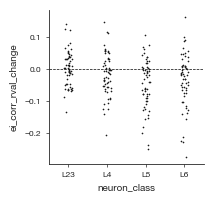

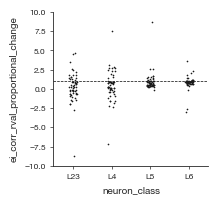

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

v1_by_layer = a_hex0_v1.custom['by_layer_and_simulation'].etl.q(window="conn_spont")
v2_by_layer = a_hex0_v2.custom['by_layer_and_simulation'].etl.q(window="conn_spont")

merged_by_layer = pd.merge(v1_by_layer, v2_by_layer, on=['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'neuron_class'], suffixes=('_v1', '_v2'))
merged_by_layer['ei_corr_rval_change'] = merged_by_layer['ei_corr_rval_v2'] - merged_by_layer['ei_corr_rval_v1']
merged_by_layer['ei_corr_rval_proportional_change'] = merged_by_layer['ei_corr_rval_v2'] / merged_by_layer['ei_corr_rval_v1']
merged_by_layer_non_bursting = merged_by_layer[np.logical_and(~merged_by_layer.bursting_v1, ~merged_by_layer.bursting_v2)]

plt.figure(figsize=(2,2))
# sns.violinplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting,color="0.8")
sns.stripplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting, jitter=True, s=1.2, c='k')
ax = plt.gca()
ax.axhline(y=0, color='black', linestyle='dashed', linewidth=.5)
plt.savefig(figdir + "layerwise_ei_change.pdf")
plt.show()
plt.close()

plt.figure(figsize=(2,2))
# sns.violinplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting,color="0.8")
sns.stripplot(x="neuron_class", y="ei_corr_rval_proportional_change", data=merged_by_layer_non_bursting, jitter=True, s=1.2, c='k')
ax = plt.gca()
ax.set_ylim([-10.0, 10.0])
ax.axhline(y=1, color='black', linestyle='dashed', linewidth=.5)
plt.savefig(figdir + "layerwise_ei_proportional_change.pdf")
plt.show()
plt.close()

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


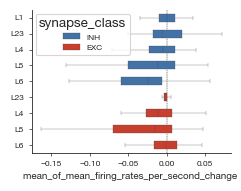

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


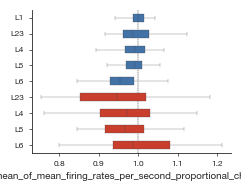

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


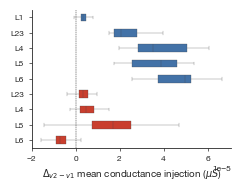

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


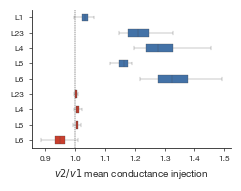

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


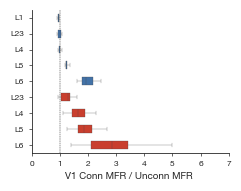

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


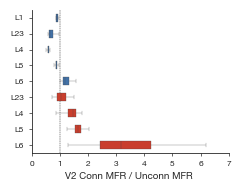

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


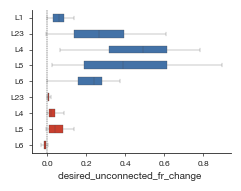

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


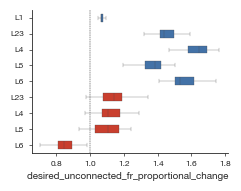

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


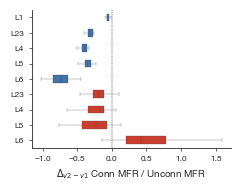

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


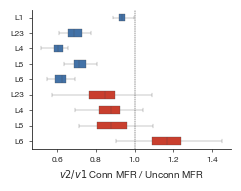

/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/notebooks/compare_sscx_v1_v2/../../cortex_etl/figures.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


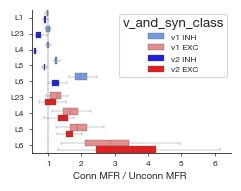

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

v1_by_nc = a_hex0_v1.custom['by_neuron_class'].etl.q(window="conn_spont")
v2_by_nc = a_hex0_v2.custom['by_neuron_class'].etl.q(window="conn_spont")

merged_by_nc = pd.merge(v1_by_nc, v2_by_nc, on=['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'neuron_class'], suffixes=('_v1', '_v2'))
merged_by_nc['true_mean_conductance_change'] = merged_by_nc.true_mean_conductance_v2 - merged_by_nc.true_mean_conductance_v1
merged_by_nc['true_mean_conductance_proportional_change'] = merged_by_nc.true_mean_conductance_v2 / merged_by_nc.true_mean_conductance_v1
merged_by_nc['connection_vs_unconn_proportion_change'] = merged_by_nc.connection_vs_unconn_proportion_v2 - merged_by_nc.connection_vs_unconn_proportion_v1
merged_by_nc['connection_vs_unconn_proportion_proportional_change'] = merged_by_nc.connection_vs_unconn_proportion_v2 / merged_by_nc.connection_vs_unconn_proportion_v1
merged_by_nc['desired_unconnected_fr_change'] = merged_by_nc.desired_unconnected_fr_v2 - merged_by_nc.desired_unconnected_fr_v1
merged_by_nc['desired_unconnected_fr_proportional_change'] = merged_by_nc.desired_unconnected_fr_v2 / merged_by_nc.desired_unconnected_fr_v1
merged_by_nc['mean_of_mean_firing_rates_per_second_change'] = merged_by_nc.mean_of_mean_firing_rates_per_second_v2 - merged_by_nc.mean_of_mean_firing_rates_per_second_v1
merged_by_nc['mean_of_mean_firing_rates_per_second_proportional_change'] = merged_by_nc.mean_of_mean_firing_rates_per_second_v2 / merged_by_nc.mean_of_mean_firing_rates_per_second_v1
merged_by_nc["neuron_class"] = merged_by_nc.neuron_class.cat.remove_unused_categories()
merged_by_nc = merged_by_nc[np.logical_and(merged_by_nc.connection_vs_unconn_proportion_v1 != np.inf, merged_by_nc.connection_vs_unconn_proportion_v2 != np.inf)]
merged_by_nc = merged_by_nc[np.logical_and(~merged_by_nc.bursting_v1, ~merged_by_nc.bursting_v2)]
merged_by_nc["synapse_class"] = merged_by_nc.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row.neuron_class]["synapse_class"], axis=1)

import seaborn as sns
from matplotlib.ticker import Locator
def horizontal_box_plot(data, y, x, figsize, order, palette, labels, line_loc, figdir, lims=[], hue=None, width=.5, gap=0, dodge=False, legend=False):
    plt.figure(figsize=figsize)
    # sns.violinplot(x="neuron_class", y="true_mean_conductance_change", data=merged_by_nc, palette=nc_c, order=nc_order)
    # sns.stripplot(y="neuron_class", x="true_mean_conductance_change", data=merged_by_nc, jitter=True, s=1.2, palette=nc_c, order=nc_order, orient='h')
    ax = plt.gca()
    sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=dodge, legend=legend)
    yticks = ax.get_yticks()  
    ax.set_yticks(yticks, labels=labels) 
    ax.set_ylabel('')
    ax.set_xlabel(stat_labels[x] + " " + stat_units[x])
    ax.axvline(x=line_loc, color='black', linestyle='dashed', linewidth=.3, zorder=-4)
    
    if len(lims):
        ax.set_xlim(lims)
    
    plt.tight_layout()
    plt.savefig(figdir + x + '.pdf', bbox_inches='tight')
    plt.show()
    plt.close()


figsize=(2.5,2)
c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "mean_of_mean_firing_rates_per_second_change", figsize, nc_order, syn_class_colors, layer_labels, 0, figdir, hue="synapse_class", legend=True, stat_labels=stat_labels, stat_units=stat_units)
c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "mean_of_mean_firing_rates_per_second_proportional_change", figsize, nc_order, syn_class_colors, layer_labels, 1, figdir, hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)
    
c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "true_mean_conductance_change", figsize, nc_order, syn_class_colors, layer_labels, 0, figdir, hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)
c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "true_mean_conductance_proportional_change", figsize, nc_order, syn_class_colors, layer_labels, 1, figdir, hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)

c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "connection_vs_unconn_proportion_v1", figsize, nc_order, syn_class_colors, layer_labels, 1, figdir, lims=[0.0, 7.0], hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)
c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "connection_vs_unconn_proportion_v2", figsize, nc_order, syn_class_colors, layer_labels, 1, figdir, lims=[0.0, 7.0], hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)

c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "desired_unconnected_fr_change", figsize, nc_order, syn_class_colors, layer_labels, 0, figdir, hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)
c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "desired_unconnected_fr_proportional_change", figsize, nc_order, syn_class_colors, layer_labels, 1, figdir, hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)

c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "connection_vs_unconn_proportion_change", figsize, nc_order, syn_class_colors, layer_labels, 0, figdir, hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)
c_etl.horizontal_box_plot(merged_by_nc, "neuron_class", "connection_vs_unconn_proportion_proportional_change", figsize, nc_order, syn_class_colors, layer_labels, 1, figdir, hue="synapse_class", stat_labels=stat_labels, stat_units=stat_units)





a_v1 = merged_by_nc.loc[:, ['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'neuron_class', 'connection_vs_unconn_proportion_v1']]
a_v2 = merged_by_nc.loc[:, ['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'neuron_class', 'connection_vs_unconn_proportion_v2']]
a_v1['v'] = 'v1'
a_v2['v'] = 'v2'
a_v1['connection_vs_unconn_proportion'] = a_v1['connection_vs_unconn_proportion_v1']
a_v2['connection_vs_unconn_proportion'] = a_v2['connection_vs_unconn_proportion_v2']

import pandas as pd
a_cat = pd.concat([a_v1, a_v2])

def set_hue(row):
    
    if "INH" in row["neuron_class"]:
        if row['v'] == 'v1':
            return 'v1 INH'
        if row['v'] == 'v2':
            return 'v2 INH'
    elif "EXC" in row["neuron_class"]:
        if row['v'] == 'v1':
            return 'v1 EXC'
        if row['v'] == 'v2':
            return 'v2 EXC'
    
a_cat['v_and_syn_class'] = a_cat.apply(lambda row: set_hue(row), axis=1)
figsize = (2.5,2)
c_etl.horizontal_box_plot(a_cat, "neuron_class", "connection_vs_unconn_proportion", figsize, nc_order, ['cornflowerblue', 'lightcoral', 'blue', 'red'], layer_labels, 1, figdir, hue='v_and_syn_class', width=.8, gap=-1, lims=[0.5, 6.5], dodge=True, legend=True, stat_labels=stat_labels, stat_units=stat_units)


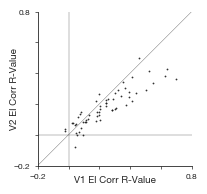

2024-04-25 12:02:12,401 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-25 12:02:12,408 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


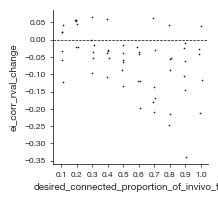

2024-04-25 12:02:12,846 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-25 12:02:12,853 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


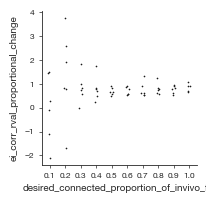

In [ ]:
v1_by_simulation = a_hex0_v1.custom['by_simulation']
v2_by_simulation = a_hex0_v2.custom['by_simulation']

merged_by_simulation = pd.merge(v1_by_simulation, v2_by_simulation, on=['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio'], suffixes=('_v1', '_v2'))
merged_by_simulation['ei_corr_rval_change'] = merged_by_simulation.ei_corr_rval_v2 - merged_by_simulation.ei_corr_rval_v1
merged_by_simulation['ei_corr_rval_proportional_change'] = merged_by_simulation.ei_corr_rval_v2 / merged_by_simulation.ei_corr_rval_v1
merged_by_simulation_non_bursting = merged_by_simulation[np.logical_and(~merged_by_simulation.bursting_v1, ~merged_by_simulation.bursting_v2)]

figsize=(2,2)

plt.figure(figsize=figsize)
plt.scatter(merged_by_simulation_non_bursting.ei_corr_rval_v1, merged_by_simulation_non_bursting.ei_corr_rval_v2, s=.2, c='k')
lims = [-0.2, 0.8]
plt.plot(lims, lims, c='k', lw=.2)
plt.plot([0.0, 0.0], lims, c='k', lw=.2)
plt.plot(lims, [0.0, 0.0], c='k', lw=.2)
ax = plt.gca()
ax.set_xlim(lims)
ax.set_ylim(lims)
# ax.set_xlabel('EI Corr R-Value (V1)')
# ax.set_ylabel('EI Corr R-Value (V2)')
ax.set_xlabel('V1 EI Corr R-Value')
ax.set_ylabel('V2 EI Corr R-Value')
c_etl.set_xy_labels_and_title(ax, 'V1 EI Corr R-Value', 'V2 EI Corr R-Value')
c_etl.remove_intermediate_axis_labels(ax)
c_etl.remove_intermediate_axis_labels(ax, y_or_x='y')
# plt.tight_layout()
ax.set_aspect('equal', 'box')
# 
plt.savefig(figdir + "global_ei_comparison.pdf", bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=figsize)
# sns.violinplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting,color="0.8")
sns.stripplot(x="desired_connected_proportion_of_invivo_frs", y="ei_corr_rval_change", data=merged_by_simulation_non_bursting, jitter=True, s=1.2, c='k')
ax = plt.gca()
ax.axhline(y=0, color='black', linestyle='dashed', linewidth=.5)
plt.savefig(figdir + "pfr_vs_global_ei_change.pdf")
plt.show()
plt.close()

plt.figure(figsize=figsize)
# sns.violinplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting,color="0.8")
sns.stripplot(x="desired_connected_proportion_of_invivo_frs", y="ei_corr_rval_proportional_change", data=merged_by_simulation_non_bursting, jitter=True, s=1.2, c='k')
ax = plt.gca()
# ax.axhline(y=0, color='black', linestyle='dashed', linewidth=.5)
plt.savefig(figdir + "pfr_vs_global_ei_proportional_change.pdf")
plt.show()
plt.close()

In [ ]:
a_hex0_v1.custom['fft']

,power,freq,log_power,bin_size,smoothing_type,kernel_sd,simulation_id,ca,desired_connected_proportion_of_invivo_frs,depol_stdev_mean_ratio,ei_corr_r_out_of_range,neuron_group_gt_threshold_fr,bursting,bursting_or_fr_gt_threshold,bursting_or_fr_gt_threshold_or_ei_corr_r_out_of_range
0,0.002002,0.2,-6.213555,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
1,0.000142,0.4,-8.863131,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
2,0.001181,0.6,-6.741570,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
3,0.002362,0.8,-6.048218,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
4,0.002750,1.0,-5.896093,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,0.007322,19.0,-4.916866,1.0,Gaussian,-1,59,1.10,1.0,0.4,True,True,False,1,2
5936,0.001083,19.2,-6.827992,1.0,Gaussian,-1,59,1.10,1.0,0.4,True,True,False,1,2
5937,0.014437,19.4,-4.237962,1.0,Gaussian,-1,59,1.10,1.0,0.4,True,True,False,1,2
5938,0.011042,19.6,-4.506026,1.0,Gaussian,-1,59,1.10,1.0,0.4,True,True,False,1,2


/nvme/isbister/2145654/ipykernel_222708/137249549.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_synapse_counts_pre, on=['layer', 'synapse_class']).rename(columns={"mean": "I_synapse_counts_pre_mean", "std": "I_path_distances_pre_std"})
/nvme/isbister/2145654/ipykernel_222708/137249549.py:51: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_by_nc_means = merged_by_nc.groupby(["neuron_class"]).mean().reset_index()


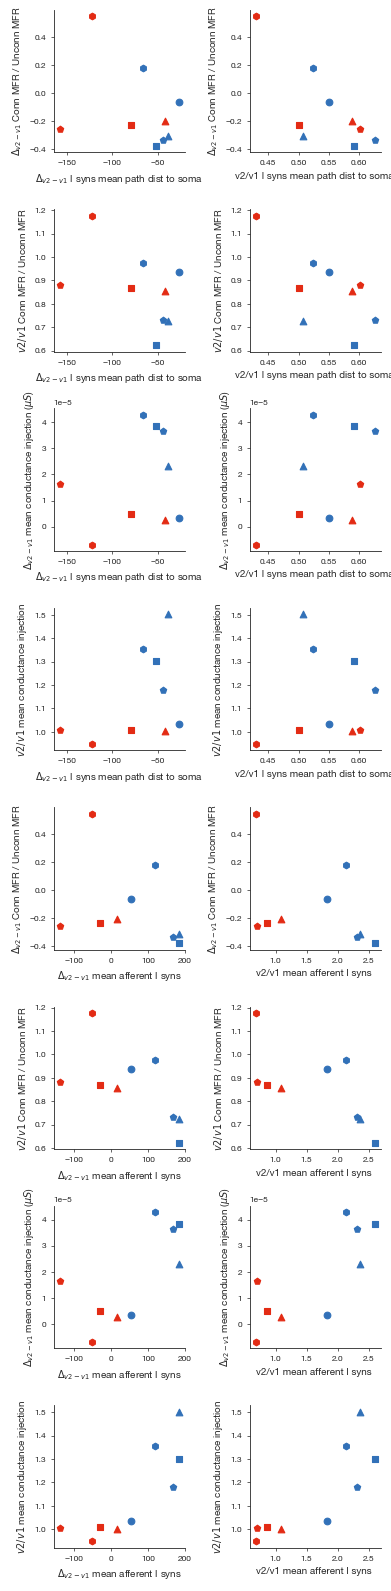

In [13]:
v2_inh_analysis_dir = 'inhibitory_analysis_output/'
import pandas as pd
v2_Inhibition_path_distances_post = pd.read_csv(v2_inh_analysis_dir + 'Inhibition_path_distances_post.csv')
v2_Inhibition_path_distances_pre = pd.read_csv(v2_inh_analysis_dir + 'Inhibition_path_distances_pre.csv')
v2_Inhibition_synapse_counts_post = pd.read_csv(v2_inh_analysis_dir + 'Inhibition_synapse_counts_post.csv')
v2_Inhibition_synapse_counts_pre = pd.read_csv(v2_inh_analysis_dir + 'Inhibition_synapse_counts_pre.csv')

v2_by_nc_no_inf = v2_by_nc[v2_by_nc['connection_vs_unconn_proportion'] != np.inf]

mean_connection_vs_unconn_proportion_by_nc = v2_by_nc_no_inf.groupby(["neuron_class", "window"]).mean().etl.q(window='conn_spont', neuron_class=c_etl.LAYER_EI_NEURON_CLASSES).reset_index()
mean_connection_vs_unconn_proportion_by_nc['layer'] = mean_connection_vs_unconn_proportion_by_nc.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['layers'][0], axis=1)
mean_connection_vs_unconn_proportion_by_nc['synapse_class'] = mean_connection_vs_unconn_proportion_by_nc.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['synapse_class'], axis=1)
mean_connection_vs_unconn_proportion_by_nc['color'] = mean_connection_vs_unconn_proportion_by_nc.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['color'], axis=1)
mean_connection_vs_unconn_proportion_by_nc['marker'] = mean_connection_vs_unconn_proportion_by_nc.apply(lambda row: c_etl.LAYER_EI_NEURON_CLASS_MARKERS[row['neuron_class']], axis=1)

mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_path_distances_post, on=['layer', 'synapse_class']).rename(columns={"mean": "I_path_distances_post_mean", "std": "I_path_distances_post_std"})
mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_path_distances_pre, on=['layer', 'synapse_class']).rename(columns={"mean": "I_path_distances_pre_mean", "std": "I_path_distances_pre_std"})
mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_synapse_counts_post, on=['layer', 'synapse_class']).rename(columns={"mean": "I_synapse_counts_post_mean", "std": "I_synapse_counts_post_std"})
mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_synapse_counts_pre, on=['layer', 'synapse_class']).rename(columns={"mean": "I_synapse_counts_pre_mean", "std": "I_path_distances_pre_std"})

mean_connection_vs_unconn_proportion_by_nc['path_distances_post_mean_change'] = mean_connection_vs_unconn_proportion_by_nc['I_path_distances_post_mean'] - mean_connection_vs_unconn_proportion_by_nc['I_path_distances_pre_mean']
mean_connection_vs_unconn_proportion_by_nc['path_distances_post_mean_change_proportion'] = mean_connection_vs_unconn_proportion_by_nc['I_path_distances_post_mean'] / mean_connection_vs_unconn_proportion_by_nc['I_path_distances_pre_mean']
mean_connection_vs_unconn_proportion_by_nc['synapse_counts_post_mean_change'] = mean_connection_vs_unconn_proportion_by_nc['I_synapse_counts_post_mean'] - mean_connection_vs_unconn_proportion_by_nc['I_synapse_counts_pre_mean']
mean_connection_vs_unconn_proportion_by_nc['synapse_counts_post_mean_change_proportion'] = mean_connection_vs_unconn_proportion_by_nc['I_synapse_counts_post_mean'] / mean_connection_vs_unconn_proportion_by_nc['I_synapse_counts_pre_mean']


def compare_neuron_class_stats_plot(df, x_y_key_pairs, filename='', c_key="color", m_key='marker'):

    n_rows = len(x_y_key_pairs); n_cols = len(x_y_key_pairs[0])
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    
    for row_ind, fig_row in enumerate(x_y_key_pairs):
        for col_ind, x_y_key_pair in enumerate(fig_row):
            ax = axes[row_ind][col_ind]
            x_key = x_y_key_pair[0]
            y_key = x_y_key_pair[1]
            
            if len(x_y_key_pair) > 2:
                
    
            for _, row in df.iterrows():
                ax.scatter(row[x_key], row[y_key], c=row[c_key], marker=row[m_key])

            ax.set_xlabel(stat_labels[x_key] + " " + stat_units[x_key])
            ax.set_ylabel(stat_labels[y_key] + " " + stat_units[y_key])
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    
    

    

merged_by_nc_means = merged_by_nc.groupby(["neuron_class"]).mean().reset_index()
merged_by_nc_means['layer'] = merged_by_nc_means.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['layers'][0], axis=1)
merged_by_nc_means['synapse_class'] = merged_by_nc_means.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['synapse_class'], axis=1)
all_nc_stats = pd.merge(mean_connection_vs_unconn_proportion_by_nc, merged_by_nc_means, on='neuron_class')

x_y_key_pairs_relative = [
    [["path_distances_post_mean_change", "connection_vs_unconn_proportion_change"], ["path_distances_post_mean_change_proportion", "connection_vs_unconn_proportion_change"]],
    [["path_distances_post_mean_change", "connection_vs_unconn_proportion_proportional_change"], ["path_distances_post_mean_change_proportion", "connection_vs_unconn_proportion_proportional_change"]],
    
    [["path_distances_post_mean_change", "true_mean_conductance_change"], ["path_distances_post_mean_change_proportion", "true_mean_conductance_change"]],
    [["path_distances_post_mean_change", "true_mean_conductance_proportional_change"], ["path_distances_post_mean_change_proportion", "true_mean_conductance_proportional_change"]],
    
    [["synapse_counts_post_mean_change", "connection_vs_unconn_proportion_change"], ["synapse_counts_post_mean_change_proportion", "connection_vs_unconn_proportion_change"]],
    [["synapse_counts_post_mean_change", "connection_vs_unconn_proportion_proportional_change"], ["synapse_counts_post_mean_change_proportion", "connection_vs_unconn_proportion_proportional_change"]],
    
    [["synapse_counts_post_mean_change", "true_mean_conductance_change"], ["synapse_counts_post_mean_change_proportion", "true_mean_conductance_change"]],
    [["synapse_counts_post_mean_change", "true_mean_conductance_proportional_change", "exp"], ["synapse_counts_post_mean_change_proportion", "true_mean_conductance_proportional_change"]],
]
compare_neuron_class_stats_plot(all_nc_stats, x_y_key_pairs_relative, filename=figdir + "inhibitory_stats.pdf")


In [ ]:
# def max_of_two_arrays(a1, a2):
#     return np.max([np.max(a1), np.max(a2)]) 

# def set_color(nc):
#   return c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[nc]["color"]

# merged_by_nc['c'] = merged_by_nc.apply(lambda row: set_color(row['neuron_class']), axis=1)